#**Ch4. 모델 훈련**

선형 회귀 모델 
- 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구함
- 경사하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화
  - 배치 경사 하강법, 미니배치 경사 하강법, 확률적 경사 하강법(SGD)

다항 회귀 모델
- 비선형 데이터셋에 훈련시킬 수 있음
- 선형 회귀보다 파라미터가 많아 훈련 데이터에 과대적합되기 더 쉬움
  - 학습 곡선(learning curve) 사용해 모델이 과대적합되는지 감지하는 방법
  - 훈련세트의 과대적합을 감소시킬 수 있는 규제 기법

로지스틱 회귀, 소프트맥스 회귀

##**4.1 선형회귀**

선형회귀 모델의 예측
$$\hat{y} = \theta_0 + \theta_1x_1 + ...+\theta_nx_n$$

* $\hat{y}$ : 예측값
* $n$ : 특성의 수
* $x_i$ : i번째 특성값
* $\theta_j$ : j번째 모델 파라미터 (편향 $\theta_0$과 특성의 가중치를 포함)

###**4.1.1 정규방정식**
$$\hat{\theta} = (X^TX)^{-1} X^Ty$$
비용함수를 최소화하는 theta값을 찾기 위한 해석적인 방법

In [18]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [19]:
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
theta_best

array([[4.31959928],
       [2.78917475]])

In [21]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.31959928],
       [9.89794879]])

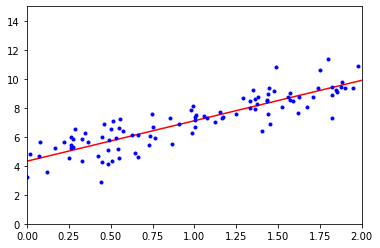

In [22]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [23]:
#선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.31959928] [[2.78917475]]
[[4.31959928]
 [9.89794879]]


In [24]:
#scipy.linalg.lstsq() : 최소제곱
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.31959928],
       [2.78917475]])

* `theta_best_svd` : $\hat{\theta} = X^{+}y$를 계산해주는 함수
* $X^{+}$ : $X$의 유사역행렬(무어-펜로즈 역행렬)

In [25]:
#유사역행렬 함수
np.linalg.pinv(X_b).dot(y)

array([[4.31959928],
       [2.78917475]])

유사역행렬 : 특잇값 분해(SVD) 사용해 계산됨

- `SVD` - 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U\Sigma V^T $ 로 분해

- `유사역행렬` - $X^+ = V\Sigma^+U^T$

###**4.1.2 계산 복잡도**


##**4.2 경사 하강법**
`경사하강법(GD)` : 비용함수를 최소화하기 위해 반복해서 파라미터를 조정
- $\theta$를 임의의 값으로 시작(무작위 초기화)
- 파라미터 $\theta$에 대해 비용 함수의 현재 그레디언트를 계산
- 그레디언트가 감소하는 방향으로 진행

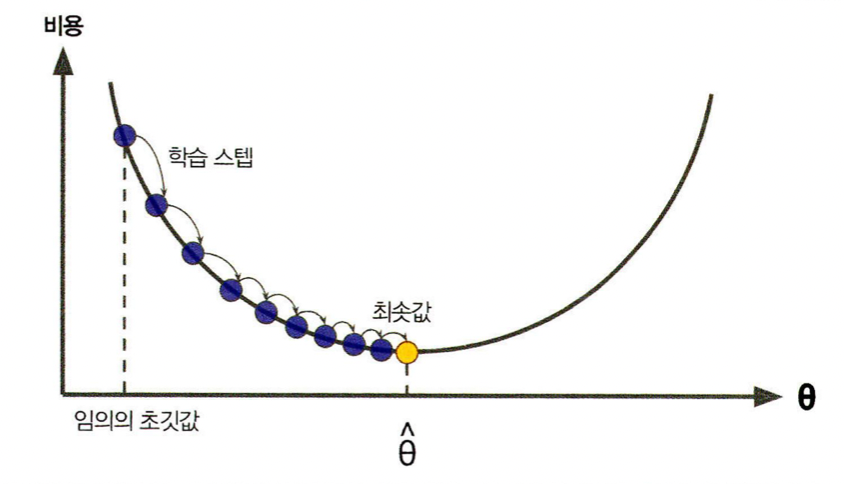


중요한 파라미터
- 학습률(learning rate)
  - 학습률이 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
  - 학습률이 크면 발산하여 적절한 해법을 찾을 수 없음
  - 그래프 형태에 따라 지역 최솟값, 전역 최솟값의 문제 (전역 최솟값을 찾아야 함)
- MSE 비용함수 :  곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수(convex function)
  - 지역 최솟값이 없고 하나의 전역 최솟값만 있음
  - 연속된 함수이고 기울기가 갑자기 변하지 않음

파라미터 공간에서 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는다.

###**4.2.1 배치 경사 하강법**

In [26]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations) : 
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

theta

array([[4.31959928],
       [2.78917475]])

###**4.2.2 확률적 경사 하강법**
매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산
- 속도 빠름, 메모리 사용량 적음

In [27]:
# 학습 스케줄을 사용한 확률적 경사 하강법
n_epochs = 50
t0,t1 = 5,50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t) : 
  return t0/(t+t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients

In [28]:
theta

array([[4.26989803],
       [2.8453713 ]])

한 반복(에포크,epoch)에서 m번 되풀이

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.26745558]), array([2.74349412]))

###**4.2.3 미니배치 경사 하강법**
미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트 계산
- 행렬 연산에 최적화된 하드웨어, GPU를 사용해서 얻는 성능 향상

* 선형회귀를 사용한 알고리즘 비교

|알고리즘|m이 클 때|n이 클 때|하이퍼 파라미터 수|사이킷런|
|---|---|---|---|---|
|정규방정식|빠름|느림|0|N/A|
|SVD|빠름|느림|0|LinearRegression|
|배치 경사 하강법|느림|빠름|2|SGDRegressor|
|확률적 경사 하강법|빠름|빠름|>=2|SGDRegressor|
|미니배치 경사 하강법|빠름|빠름|>=2|SGDRegressor|

##**4.3 다항회귀**
`다항회귀(Polynomial regression)` : 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것


In [31]:
#2차방정식으로 비선형데이터 생성
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[2.50343032] [2.50343032 6.26716339]


In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85362146]), array([[0.98812607, 0.51745656]]))

- 특성이 여러개일 때 특성 사이의 관계 찾기
- PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가

##**4.4 학습 곡선**


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='훈련세트')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='검증세트')

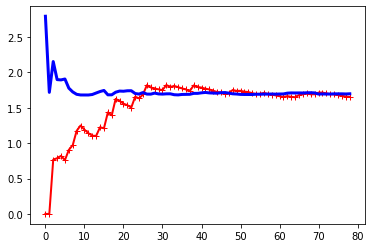

In [36]:
#단순 선형 회귀 모델 학습곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

- 과소적합 모델(학습데이터를 제대로 반영하지 못함)
  - 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접

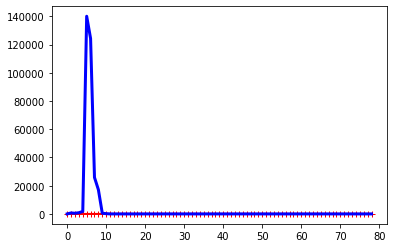

In [37]:
#10차 다항 회귀 모델 학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree = 10,include_bias = False)),
    ('lin_reg',LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

이전 학습 곡선과의 차이점
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 두 곡선 사이에 공간이 있다 ; 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻, 과대적합 모델의 특징
  - 더 큰 훈련세트를 사용하면 두 곡선이 점점 가까워짐

편향/분산 트레이드오프


##**4.5 규제가 있는 선형 모델**
규제 : 과대적합을 감소
- 다항 회귀 모델의 경우 다항식 차수 감소
- 선형 회귀 모델의 경우 모델의 가중치 제한


###**4.5.1 릿지 회귀**
규제항이 비용함수에 추가 
- 가중치 벡터의 $l_2$ 노름 제곱을 2로 나눈 것 사용
- 학습 알고리즘을 데이터에 맞추고 모델의 가중치가 가능한 한 작게 유지되도록 함
- 릿지 회귀의 비용함수

$$J(\theta) = MSE(\theta) + α{1 \over 2}\sum\limits_{i = 1}^{n} \theta_i ^2$$

- $\alpha$ : 모델을 얼마나 많이 규제할지 조정, 증가할수록 직선에 가까움(분산 줄고 편향 커짐)


In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.09386584]])

- 확률적 경사하강법

In [39]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.06623338])

###**4.5.2 라쏘 회귀**
선형 회귀의 또 다른 규제된 버전
- 가중치 벡터의 $l_1$ 노름 사용
- 라쏘 회귀의 비용함수
$$J(\theta) = MSE(\theta) + α\sum\limits_{i = 1}^{n} |\theta_i| $$

- 덜 중요한 특성의 가중치를 제거하려고 함
  - 자동으로 특성 선택을 하고 희소 모델을 만듬

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.05712299])

###**4.5.3 엘라스틱넷**
릿지 회귀와 라쏘 회귀를 절충한 모델

규제항 : 릿지와 회귀의 규제항의 합, 혼합정도는 r

In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.055351])

###**4.5.4 조기 종료**
검증 에러가 최솟값에 도달하면 훈련을 중지

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = 'constant',eta0 = 0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000) :
  sgd_reg.fit(X_train_poly_scaled,y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error :
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

##**4.6 로지스틱 회귀**
샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 이용됨
- 추정 확률이 50% 넘으면 샘플이 해당 클래스에 속한다고 예측

### **4.6.1 확률 추정**
로지스틱 회귀
- 입력 특성의 가중치 합을 계산하고 편향을 더함
- 결괏값의 로지스틱을 출력

`로지스틱` : 0과 1 사이의 값을 출력하는 시그모이드 함수(sigmoid function)

$$\sigma(t) = {1 \over 1+ e^{-t}}$$

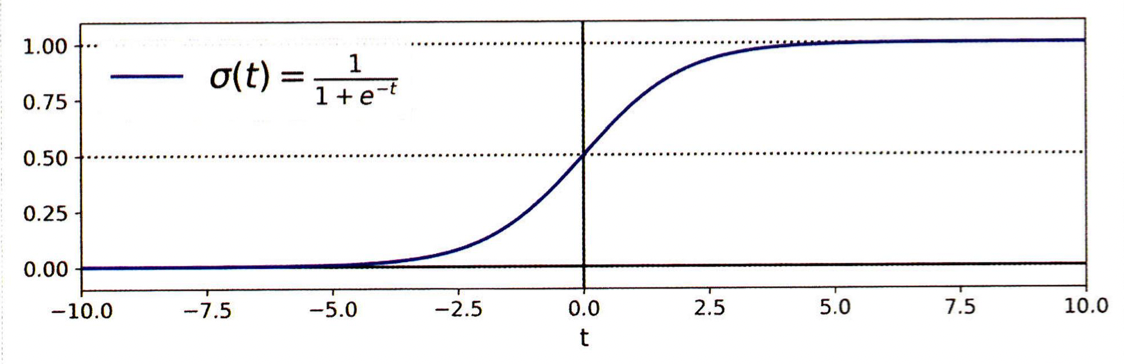

###**4.6.2 훈련과 비용함수**
- 훈련의 목적 : 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것
- 로그 손실(log loss) : 전체 훈련 세트에 대한 비용 함수; 모든 훈련 샘플의 비용을 평균한 것
  - 비용 함수의 최솟값을 계산하는 알려진 해가 없다

### **4.6.3 결정 경계**
붓꽃 데이터셋 - 세 개의 품종에 속하는 붓꽃 150개의 꽃잎(petal)과 꽃받침(sepal)의 너비와 길이

- 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [48]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

<ipython-input-48-bd3afa1b6809>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int)


In [49]:
#로지스틱 회귀 모델 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

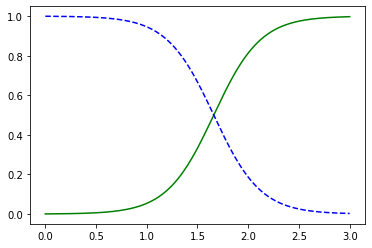

In [51]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label = 'Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not Iris virginica')

In [52]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### **4.6.4 소프트맥스 회귀**
**소프트맥스 회귀(다항 로지스틱 회귀)** : 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 다중 클래스를 지원하도록 일반화

샘플 x가 주어지면 회귀 모델이 각 클래스 k에 대한 점수 s(x)를 계산, 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정

>**소프트맥스 함수**

$$\hat{p_k} = \sigma(s(x))_k = {exp(s_k(x)) \over \sum\limits_{j = 1}^{K}exp(s_j(x))}$$

  * $K$는 각 클래스 의 수
  * s(x)는 샘플x에 대한 각 클래스의 점수를 담은 벡터
  * $\sigma(x(x))_k$는 샘플 x에 대한 각 클래스의 점수가 주어졌을 떄 이 샘플이 클래스 k에 속할 추정 확률

In [50]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs',C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [53]:
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])